<a href="https://colab.research.google.com/github/FilipRenschJacobsen/02456-deep-learning-with-PyTorch/blob/master/Copy_of_Filips_Leaf_Detection_One_Shot_Learning_Version_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# needed libaries to run this include: Pytorch, , torchsummary OpenCV, Pandas, Numpy

In [ ]:
from os import walk
import os
import torch
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torchvision.utils
from torch.utils.data import DataLoader
import os
from PIL import Image
import PIL.ImageOps

import cv2
from torchsummary import summary
from torch.utils.data import Dataset, DataLoader, random_split
import pandas as pd
import numpy as np
import random
import torch.nn as nn
import torch.nn.functional as F

%matplotlib inline
import matplotlib
import glob
import os

from IPython.display import clear_output
from skimage.io import imread
from skimage.transform import resize

#import data_utils

from torch.autograd import Variable
import torch.nn as nn
import torch.optim as optim
from torch.nn import Linear, GRU, Conv2d, Dropout, MaxPool2d, BatchNorm1d
from torch.nn.functional import relu, elu, relu6, sigmoid, tanh, softmax

cv2.setNumThreads(0)


In [ ]:
# Check if GPU er avialable
print(torch.cuda.is_available())

if torch.cuda.is_available():
    device_used = torch.cuda.current_device()
    print(torch.cuda.get_device_name(device_used))

True
Tesla P4


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi
%cd /content
!ls

Sun Oct 18 20:04:34 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     7W /  75W |     10MiB /  7611MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# setting the root directories and categories of the images
# root_dir = './images_resized/'
root_dir = os.getcwd()+"/drive/My Drive/Data/images_resized/"   

image_paths = glob.glob("/content/drive/My Drive/Data/images_resized/*.jpg")
print("Total Observations:\t", len(image_paths))
print(image_paths)

# now loading the train.csv to find features for each training point
train = pd.read_csv('/content/drive/My Drive/Data/train.csv')
train_images = ['/images_resized/{}.jpg'.format(i) for i in train.id.values]

# now loading the test.csv
test = pd.read_csv('/content/drive/My Drive/Data/test.csv')

categories = []  #insert catogories, load training set, find unique species names
print(root_dir)
categories = train["species"].unique()
for x in  categories:
    occurence = len(train[train["species"] ==x])
    print(f"{x} : {occurence}")
print()
print(f"number of catagories {len(categories)}")
print(categories)

Total Observations:	 1584
['/content/drive/My Drive/Data/images_resized/1511.jpg', '/content/drive/My Drive/Data/images_resized/15.jpg', '/content/drive/My Drive/Data/images_resized/1542.jpg', '/content/drive/My Drive/Data/images_resized/1544.jpg', '/content/drive/My Drive/Data/images_resized/155.jpg', '/content/drive/My Drive/Data/images_resized/1554.jpg', '/content/drive/My Drive/Data/images_resized/1547.jpg', '/content/drive/My Drive/Data/images_resized/1539.jpg', '/content/drive/My Drive/Data/images_resized/154.jpg', '/content/drive/My Drive/Data/images_resized/1545.jpg', '/content/drive/My Drive/Data/images_resized/1532.jpg', '/content/drive/My Drive/Data/images_resized/1526.jpg', '/content/drive/My Drive/Data/images_resized/1546.jpg', '/content/drive/My Drive/Data/images_resized/1550.jpg', '/content/drive/My Drive/Data/images_resized/1533.jpg', '/content/drive/My Drive/Data/images_resized/1531.jpg', '/content/drive/My Drive/Data/images_resized/1530.jpg', '/content/drive/My Drive/

['Acer_Capillipes' 'Acer_Circinatum' 'Acer_Mono' 'Acer_Opalus'
 'Acer_Palmatum' 'Acer_Pictum' 'Acer_Platanoids' 'Acer_Rubrum'
 'Acer_Rufinerve' 'Acer_Saccharinum' 'Alnus_Cordata' 'Alnus_Maximowiczii'
 'Alnus_Rubra' 'Alnus_Sieboldiana' 'Alnus_Viridis' 'Arundinaria_Simonii'
 'Betula_Austrosinensis' 'Betula_Pendula' 'Callicarpa_Bodinieri'
 'Castanea_Sativa' 'Celtis_Koraiensis' 'Cercis_Siliquastrum'
 'Cornus_Chinensis' 'Cornus_Controversa' 'Cornus_Macrophylla'
 'Cotinus_Coggygria' 'Crataegus_Monogyna' 'Cytisus_Battandieri'
 'Eucalyptus_Glaucescens' 'Eucalyptus_Neglecta' 'Eucalyptus_Urnigera'
 'Fagus_Sylvatica' 'Ginkgo_Biloba' 'Ilex_Aquifolium' 'Ilex_Cornuta'
 'Liquidambar_Styraciflua' 'Liriodendron_Tulipifera'
 'Lithocarpus_Cleistocarpus' 'Lithocarpus_Edulis' 'Magnolia_Heptapeta'
 'Magnolia_Salicifolia' 'Morus_Nigra' 'Olea_Europaea' 'Phildelphus'
 'Populus_Adenopoda' 'Populus_Grandidentata' 'Populus_Nigra'
 'Prunus_Avium' 'Prunus_X_Shmittii' 'Pterocarya_Stenoptera'
 'Quercus_Afares' 'Querc

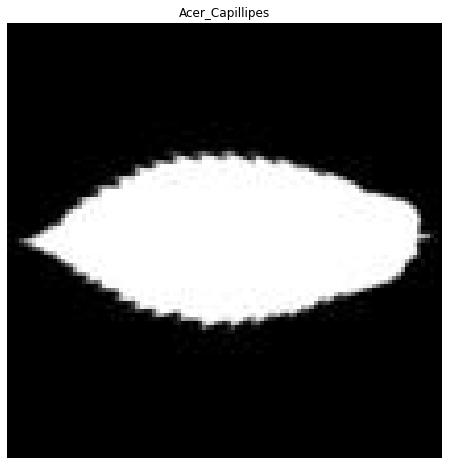

In [ ]:
# First we find an example of each species in order to visualize it
species = np.array(sorted(train.species.unique()))
species_examples = [np.random.choice(train[train.species == s].id.values) for s in species]
print(species)
print(species_examples)
print(len(species))
print(len(species_examples))

# Then we gather its' index in our list of images in order to find the correct image
#indexes = [image_paths.index('images/{}.jpg'.format(i)) for i in species_examples]

# Plot of the first image
plt.figure(figsize=(8, 8))
image = imread(image_paths[0], as_gray=True)
plt.imshow(image, cmap='gray')
plt.title("%s" % (species[0]))
plt.axis('off')
plt.show()


       id          species
111   201  Acer_Capillipes
951  1525  Acer_Capillipes
370   610  Acer_Capillipes
126   227  Acer_Capillipes
859  1377  Acer_Capillipes
..    ...              ...
898  1443  Zelkova_Serrata
744  1198  Zelkova_Serrata
326   535  Zelkova_Serrata
709  1136  Zelkova_Serrata
196   336  Zelkova_Serrata

[990 rows x 2 columns]
       id          species
0     201  Acer_Capillipes
1    1525  Acer_Capillipes
2     610  Acer_Capillipes
3     227  Acer_Capillipes
4    1377  Acer_Capillipes
..    ...              ...
985  1443  Zelkova_Serrata
986  1198  Zelkova_Serrata
987   535  Zelkova_Serrata
988  1136  Zelkova_Serrata
989   336  Zelkova_Serrata

[990 rows x 2 columns]
finding first occurence of 'Acer_Circinatum':
10

Acer_Circinatum
is found at file:
/content/drive/My Drive/Data/images_resized/11.jpg


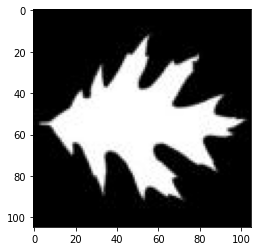

In [ ]:
#build an array of: species and image names in order to create pairs later

species_array = train

species_array = species_array.sort_values(by=['species'])

species_array = species_array[['id','species']]

species_array['id'] = species_array['id'].apply(str) #convert int to str to call the right file later

print(species_array)

species_array = species_array.reset_index(drop=True) #to rest index after sorting

print(species_array)

testing = species_array['species'].searchsorted('Acer_Circinatum', side='left') #finding the first of 'Acer_Circinatum'
print("finding first occurence of 'Acer_Circinatum':")
print(testing)

print()
print(species_array.at[testing,'species'])
print("is found at file:")
print(root_dir + str(testing+1)+".jpg")
img1 = imread(root_dir + str(testing+1)+".jpg")

plt.imshow(img1, cmap='gray')

Quercus_Ilex


FileNotFoundError: ignored

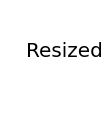

In [ ]:
## Image pre-processing
image_size = (105, 105)  

# Amount of images
amount = 5
random_specie = random.choice(categories)
image_sample = species_array['species'].searchsorted(random_specie, side='left') #finding the first of random_specie

ax = plt.subplot(2, amount + 1, 10 + 2)
txt = ax.text(0.4, 0.5, 'Resized', fontsize=20)
txt.set_clip_on(False)
plt.axis('off')
print(random_specie)

img1 = imread(root_dir + str(species_array.loc[species_array['species'] == random_specie, 'id']+".jpg"))
plt.imshow(img1, cmap='gray')

plt.show()
print("nyt")


In [ ]:
# convert pictures in folder to resized images... is commented out bacuse i dont want to do it everytime i run this thing

#amount = len(image_paths)
#image_sample = image_paths
#new_folder = "\images_resized"

#print(amount)

#for i, path in enumerate(image_sample):
#    image = imread(path, as_gray=True)
#    image = data_utils.pad2square(image)  # Make the image square
#    image = resize(image, output_shape=image_size, mode='reflect', anti_aliasing=True)  # resizes the image
#    plt.imsave(os.getcwd()+new_folder+"\\"+str(i+1)+".jpg", image, cmap='gray', format = 'jpg')

/content/drive/My Drive/Data/images_resized/
/content/drive/My Drive/Data/images_resized/247.jpg
Cornus_Macrophylla


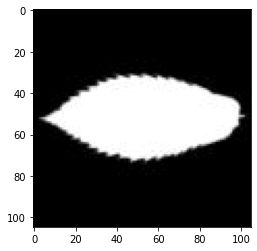

In [ ]:
# assigning root_dir to the new folder with resized images..
first_position = 244
image1_nr = 2
root_dir = os.getcwd()+"/drive"+"/My Drive"+"/Data" + "/images_resized"+"/"
print(root_dir)
print(root_dir + str(first_position+image1_nr+1)+".jpg")
print(species_array.loc[first_position+image1_nr+1,'species'])
plt.imshow(image, cmap='gray')

In [ ]:
# creating the pairs of images for inputs, same specie label = 1, vice versa
class Leaf_class__data(Dataset):
    def __init__(self, categories, root_dir, setSize, transform=None):
        self.categories = categories
        self.root_dir = root_dir
        self.transform = transform
        self.setSize = setSize
    
    def __len__(self):
        return self.setSize
    
    def __getitem__(self, idx):
        img1 = None
        img2 = None
        label = None
        if idx % 2 == 0: # select the same specie for both images
            category = random.choice(categories)
            
            image1_nr = random.randint(1,11)
            image2_nr = random.randint(1,11)
            while image1_nr == image2_nr:   # Not to get the same number
                image2_nr = random.randint(1,11)
            
            first_position = species_array['species'].searchsorted(category, side='left') #finding first position in sorted array
            
            img1 = imread(root_dir + str(first_position+image1_nr)+".jpg", as_gray=True) #getting 2 random images
            img2 = imread(root_dir + str(first_position+image2_nr)+".jpg", as_gray=True) #from the right catagory
            img1 = img1.astype(np.float32)
            img2 = img2.astype(np.float32)
            
            label = 1.0
        else: # select a different specie for both images
            
            category1 = random.choice(categories)
            category2 = random.choice(categories)
            while category1 == category2:   # Not to get the same category
                category2 = random.choice(categories)
            
            image1_nr = random.randint(1,11)
            image2_nr = random.randint(1,11)
            
            first_position = species_array['species'].searchsorted(category1, side='left') #finding first position in sorted array
            second_position = species_array['species'].searchsorted(category2, side='left') #finding first position in sorted array
            
            img1 = imread(root_dir + str(first_position+image1_nr)+".jpg", as_gray=True) #getting 2 random images
            img2 = imread(root_dir + str(second_position+image2_nr)+".jpg", as_gray=True) #from different catagories
            img1 = img1.astype(np.float32)
            img2 = img2.astype(np.float32)


            label = 0.0
            
        if self.transform:
            img1 = self.transform(img1)
            img2 = self.transform(img2)
        return img1, img2, torch.from_numpy(np.array([label], dtype=np.float32))

In [ ]:
# creates n-way one shot learning evaluation

'''
        categories is the list of different species
        root_dir is the root directory leading to the images
        setSize is the size of the train set and the validation set combined
        numWay is the number of images (classes) you want to test for evaluation
        transform is any image transformations
'''

class OneShotEvalSet(Dataset):
    def __init__(self, categories, root_dir, setSize, numWay, transform=None):
        self.categories = categories
        self.root_dir = root_dir
        self.setSize = setSize
        self.numWay = numWay
        self.transform = transform
    def __len__(self):
        return self.setSize
    def __getitem__(self, idx):
        # find one main image
        main_specie = random.choice(categories)
        first_position = species_array['species'].searchsorted(main_specie, side='left') #finding first position in sorted array
        image_Main_nr = random.randint(1,11)
        
        #Loading the random main image into mainImg
        mainImg = imread(root_dir + str(first_position+image_Main_nr)+".jpg", as_gray=True)
        mainImg = mainImg.astype(np.float32)
        
        print(f"mainImg: {main_specie}")
        if self.transform:
            mainImg = self.transform(mainImg)
        
        # find n numbers of distinct images, 1 in the same set as the main
        testSet = []
        label = np.random.randint(self.numWay) 
        for i in range(self.numWay):
            test_Main_Specie = main_specie
            #picking a picture within the same specie as mainImg (to make sure we have 1 of the same speice as main)
            #test_specie = random.choice(categories)
            first_position = species_array['species'].searchsorted(test_Main_Specie, side='left') #finding first position of specie in sorted array
            image_Test_nr = random.randint(1,11)
            while image_Main_nr == image_Test_nr:  #to make sure it is not the same as main image
                image_Test_nr = random.randint(1,11)

            testImgName = ''
            if i == label:
                testImgName = str(first_position+image_Test_nr)+".jpg"
            else:
                test_Specie = random.choice(categories)
                first_position = species_array['species'].searchsorted(species_array.loc[i*10,'species'], side='left') #finding first position in sorted array       
                testImgName = str(first_position+image_Test_nr)+".jpg"
            testImg = imread(root_dir + testImgName, as_gray=True)
            testImg = testImg.astype(np.float32)
            
            if self.transform:
                testImg = self.transform(testImg)
            testSet.append(testImg)
        # plt.imshow()
        return mainImg, testSet, torch.from_numpy(np.array([label], dtype = int))

In [ ]:
print(root_dir)
imgtest = imread(root_dir + "1583"+".jpg",as_gray=True)
print(root_dir)
print(imgtest.shape)

/content/drive/My Drive/Data/images_resized/
/content/drive/My Drive/Data/images_resized/
(105, 105)


In [ ]:
print(path)

/images_resized/152.jpg


In [ ]:
# choose a training dataset size and further divide it into train and validation set 80:20
dataSize = 990 # self-defined dataset size
TRAIN_PCT = 0.8 # percentage of entire dataset for training
train_size = int(dataSize * TRAIN_PCT)
val_size = dataSize - train_size

#transformations = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))]) 
transformations = transforms.Compose(
    [transforms.ToTensor()]) 

print(root_dir)

leafDataset = Leaf_class__data(categories, root_dir, dataSize, transformations)
train_set, val_set = random_split(leafDataset, [train_size, val_size])   

train_loader = torch.utils.data.DataLoader(train_set, batch_size=128, num_workers=16)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=1, num_workers=1, shuffle=True)

/content/drive/My Drive/Data/images_resized/


In [ ]:
#create the test set for final testing
testSize = 500
numWay = 99
test_set = OneShotEvalSet(categories, root_dir, testSize, numWay, transformations)
test_loader = torch.utils.data.DataLoader(test_set, batch_size = 1, num_workers = 1, shuffle=True)

In [ ]:
#print("# Training data")
#print(root_dir)
#print("Number of points:", len(train_set))

#img1, img2, label = train_loader
#print(label)
#x, y = next(iter(train_loader))
#print("Batch dimension [B x C x H x W]:", x.shape)
#print("Number of distinct labels:", len(set(train_set.targets)))


#print("\n# Test data")
#print("Number of points:", len(test_set))
#x, y = next(iter(test_loader))
#print("Batch dimension [B x C x H x W]:", x.shape)


tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


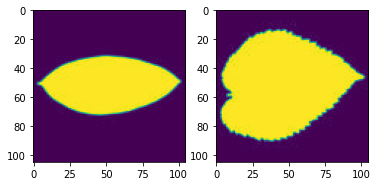

In [ ]:
# showing a sample input of a training set
count0 = 0
count1 = 0
for img1, img2, label in train_loader:
    print()
    if label[0] == 1.0:
        print(img1[0])
        plt.subplot(1,2,1)
        plt.imshow(img1[0][0])
        plt.subplot(1,2,2)
        plt.imshow(img2[0][0])
        # print(label)
        break
    # break


mainImg: Eucalyptus_Neglecta
mainImg: Quercus_Dolicholepis
torch.Size([1, 1, 105, 105])


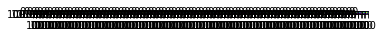

In [ ]:
# showing a sample input of the testing set
count = 0
for mainImg, imgset, label in test_loader:
   
     if label != 1:
        for count, img in enumerate(imgset):
            plt.subplot(1, len(imgset)+1, count+1)
            plt.imshow(img[0][0])
         # print(img.shape)
        print(mainImg.shape)
        plt.subplot(1, len(imgset)+1, len(imgset)+1)
        plt.imshow(mainImg[0][0])
        count += 1
        break
    # break

In [ ]:
#Different network structures, the commented out are the different experimenting structures
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # Koch et al.
        # Conv2d(input_channels, output_channels, kernel_size)
        self.conv1 = nn.Conv2d(1, 64, 10) 
        self.conv2 = nn.Conv2d(64, 128, 7)  
        self.conv3 = nn.Conv2d(128, 128, 4)
        self.conv4 = nn.Conv2d(128, 256, 4)
        self.bn1 = nn.BatchNorm2d(64)
        self.bn2 = nn.BatchNorm2d(128)
        self.bn3 = nn.BatchNorm2d(128)
        self.bn4 = nn.BatchNorm2d(256)
        self.dropout1 = nn.Dropout(0.1)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(256 * 6 * 6, 4096)
        self.fcOut = nn.Linear(4096, 1)
        self.sigmoid = nn.Sigmoid()

        # VGG16
        # # dataiter = iter(train_loader)
        # # img1, img2, label = dataiter.next()
        # # print(img1.shape)
        # self.conv11 = nn.Conv2d(1, 64, 3) 
        # self.conv12 = nn.Conv2d(64, 64, 3)  
        # self.conv21 = nn.Conv2d(64, 128, 3)
        # self.conv22 = nn.Conv2d(128, 128, 3)
        # self.conv31 = nn.Conv2d(128, 256, 3) 
        # self.conv32 = nn.Conv2d(256, 256, 3)  
        # self.conv33 = nn.Conv2d(256, 256, 3)
        # self.pool = nn.MaxPool2d(2, 2)
        # self.fc1 = nn.Linear(256 * 8 * 8, 4096)
        # self.fc2 = nn.Linear(4096, 4096)
        # self.fcOut = nn.Linear(4096, 1)
        # self.sigmoid = nn.Sigmoid()
        # # x = self.conv11(img1)
        # # x = self.conv12(x)
        # # x = self.pool(x)
        # # x = self.conv21(x)
        # # x = self.conv22(x)
        # # x = self.pool(x)
        # # x = self.conv31(x)
        # # x = self.conv32(x)
        # # x = self.conv33(x)
        # # x = self.pool(x)
        # # print(x.shape)
    
    def convs(self, x):

        # Koch et al.
        # out_dim = in_dim - kernel_size + 1  
        #1, 105, 105
        x = F.relu(self.bn1(self.conv1(x)))
        # 64, 96, 96
        x = F.max_pool2d(x, (2,2))
        # 64, 48, 48
        x = F.relu(self.bn2(self.conv2(x)))
        # 128, 42, 42
        x = F.max_pool2d(x, (2,2))
        # 128, 21, 21
        x = F.relu(self.bn3(self.conv3(x)))
        # 128, 18, 18
        x = F.max_pool2d(x, (2,2))
        # 128, 9, 9
        x = F.relu(self.bn4(self.conv4(x)))
        # 256, 6, 6
        return x

        # VGG16
        # x = F.relu(self.conv11(x))
        # x = F.relu(self.conv12(x))
        # x = F.max_pool2d(x, (2,2))
        # x = F.relu(self.conv21(x))
        # x = F.relu(self.conv22(x))
        # x = F.max_pool2d(x, (2,2))
        # x = F.relu(self.conv31(x))
        # x = F.relu(self.conv32(x))
        # x = F.relu(self.conv33(x))
        # x = F.max_pool2d(x, (2,2))
        # return x

    def forward(self, x1, x2):
        x1 = self.convs(x1)

        # Koch et al.
        x1 = x1.view(-1, 256 * 6 * 6)
        x1 = self.sigmoid(self.fc1(x1))

        # VGG16
        # x1 = x1.view(-1, 256 * 8 * 8)
        # x1 = self.fc1(x1)
        # x1 = self.sigmoid(self.fc2(x1))
        
        x2 = self.convs(x2)

        # Koch et al.
        x2 = x2.view(-1, 256 * 6 * 6)
        x2 = self.sigmoid(self.fc1(x2))

        # VGG16
        # x2 = x2.view(-1, 256 * 8 * 8)
        # x2 = self.fc1(x2)
        # x2 = self.sigmoid(self.fc2(x2))

        x = torch.abs(x1 - x2)
        x = self.fcOut(x)
        return x

In [ ]:
#creating the original network and couting the paramenters of different networks
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

siameseBaseLine = Net()
siameseBaseLine = siameseBaseLine.to(device)

def count_parameters(model):
    temp = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f'The model architecture:\n\n', model)
    print(f'\nThe model has {temp:,} trainable parameters')
    
count_parameters(siameseBaseLine)


The model architecture:

 Net(
  (conv1): Conv2d(1, 64, kernel_size=(10, 10), stride=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(7, 7), stride=(1, 1))
  (conv3): Conv2d(128, 128, kernel_size=(4, 4), stride=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(4, 4), stride=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.1, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=4096, bias=True)
  (fcOut): Linear(in_features=4096, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

The model has 38,952,897 trainable parameters


In [ ]:
next(siameseBaseLine.parameters()).is_cuda

True

In [ ]:
# saving and loading checkpoint mechanisms
def save_checkpoint(save_path, model, optimizer, val_loss):
    if save_path==None:
        return
    save_path = save_path 
    state_dict = {'model_state_dict': model.state_dict(),
                  'optimizer_state_dict': optimizer.state_dict(),
                  'val_loss': val_loss}

    torch.save(state_dict, save_path)

    print(f'Model saved to ==> {save_path}')

def load_checkpoint(model, optimizer):
    save_path = f'siameseNet-batchnorm50.pt'
    state_dict = torch.load(save_path)
    model.load_state_dict(state_dict['model_state_dict'])
    optimizer.load_state_dict(state_dict['optimizer_state_dict'])
    val_loss = state_dict['val_loss']
    print(f'Model loaded from <== {save_path}')
    
    return val_loss

In [ ]:

# training and validation after every epoch
def train(model, train_loader, val_loader, num_epochs, criterion, save_name):
    best_val_loss = float("Inf") 
    train_losses = []
    val_losses = []
    cur_step = 0
    for epoch in range(num_epochs):
        running_loss = 0.0
        model.train()
        print("Starting epoch " + str(epoch+1))
        for img1, img2, labels in train_loader:
            
            # Forward
            img1 = img1.to(device)
            img2 = img2.to(device)
            labels = labels.to(device)
            outputs = model(img1, img2)
            loss = criterion(outputs, labels)
            
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        
        val_running_loss = 0.0
        with torch.no_grad():
            model.eval()
            for img1, img2, labels in val_loader:
                img1 = img1.to(device)
                img2 = img2.to(device)
                labels = labels.to(device)
                outputs = model(img1, img2)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item()
        avg_val_loss = val_running_loss / len(val_loader)
        val_losses.append(avg_val_loss)
        
        print('Epoch [{}/{}],Train Loss: {:.4f}, Valid Loss: {:.8f}'
            .format(epoch+1, num_epochs, avg_train_loss, avg_val_loss))
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            save_checkpoint(save_name, model, optimizer, best_val_loss)
    
    print("Finished Training")  
    return train_losses, val_losses  

# evaluation metrics
def eval(model, test_loader):
    with torch.no_grad():
        model.eval()
        correct = 0
        print('Starting Iteration')
        count = 0
        for mainImg, imgSets, label in test_loader:
            mainImg = mainImg.to(device)
            predVal = 0
            pred = -1
            for i, testImg in enumerate(imgSets):
                testImg = testImg.to(device)
                output = model(mainImg, testImg)
                if output > predVal:
                    pred = i
                    predVal = output
            label = label.to(device)
            if pred == label:
                correct += 1
            count += 1
            if count % 20 == 0:
                print("Current Count is: {}".format(count))
                print('Accuracy on n way: {}'.format(correct/count))

In [ ]:
# actual training
import torch.optim as optim

optimizer = optim.Adam(siameseBaseLine.parameters(), lr = 0.0006)
num_epochs = 50
criterion = nn.BCEWithLogitsLoss()
save_path = 'siameseNet-batchnorm50.pt'
train_losses, val_losses = train(siameseBaseLine, train_loader, val_loader, num_epochs, criterion, save_path)

Starting epoch 1
Epoch [1/50],Train Loss: 0.8192, Valid Loss: 0.69488643
Model saved to ==> siameseNet-batchnorm50.pt
Starting epoch 2
Epoch [2/50],Train Loss: 0.7246, Valid Loss: 0.74477069
Starting epoch 3
Epoch [3/50],Train Loss: 0.7385, Valid Loss: 0.77400893
Starting epoch 4
Epoch [4/50],Train Loss: 0.7225, Valid Loss: 0.70160822
Starting epoch 5
Epoch [5/50],Train Loss: 0.6992, Valid Loss: 0.70476614
Starting epoch 6
Epoch [6/50],Train Loss: 0.6974, Valid Loss: 0.71815529
Starting epoch 7
Epoch [7/50],Train Loss: 0.7079, Valid Loss: 0.69645193
Starting epoch 8
Epoch [8/50],Train Loss: 0.6924, Valid Loss: 0.70532794
Starting epoch 9
Epoch [9/50],Train Loss: 0.6989, Valid Loss: 0.70558439
Starting epoch 10
Epoch [10/50],Train Loss: 0.6925, Valid Loss: 0.70029481
Starting epoch 11
Epoch [11/50],Train Loss: 0.7007, Valid Loss: 0.69644866
Starting epoch 12
Epoch [12/50],Train Loss: 0.6922, Valid Loss: 0.70121508
Starting epoch 13
Epoch [13/50],Train Loss: 0.6953, Valid Loss: 0.7013905

In [ ]:
# Evaluation on previously saved models
import torch.optim as optim
load_model = Net().to(device)
load_optimizer = optim.Adam(load_model.parameters(), lr=0.0006)


num_epochs = 10
eval_every = 1000
total_step = len(train_loader)*num_epochs
best_val_loss = load_checkpoint(load_model, load_optimizer)

print(best_val_loss)
eval(load_model, test_loader)

Model loaded from <== siameseNet-batchnorm50.pt
0.6906853251987033
Starting Iteration
mainImg: Quercus_Pubescens
mainImg: Quercus_Texana
mainImg: Quercus_Pontica
mainImg: Prunus_X_Shmittii
mainImg: Magnolia_Salicifolia
mainImg: Quercus_Crassifolia
mainImg: Phildelphus
mainImg: Callicarpa_Bodinieri
mainImg: Prunus_X_Shmittii
mainImg: Quercus_Cerris
mainImg: Ulmus_Bergmanniana
mainImg: Populus_Nigra
mainImg: Quercus_x_Turneri
mainImg: Quercus_Imbricaria
mainImg: Quercus_Variabilis
mainImg: Eucalyptus_Urnigera
mainImg: Acer_Pictum
mainImg: Quercus_Crassifolia
mainImg: Quercus_Canariensis
mainImg: Quercus_Variabilis
mainImg: Tilia_Tomentosa
mainImg: Alnus_Rubra
mainImg: Populus_Nigra
Current Count is: 20
Accuracy on n way: 0.05
mainImg: Prunus_Avium
mainImg: Quercus_Pubescens
mainImg: Acer_Saccharinum
mainImg: Ulmus_Bergmanniana
mainImg: Quercus_Infectoria_sub
mainImg: Populus_Grandidentata
mainImg: Cytisus_Battandieri
mainImg: Acer_Platanoids
mainImg: Crataegus_Monogyna
mainImg: Acer_Mono

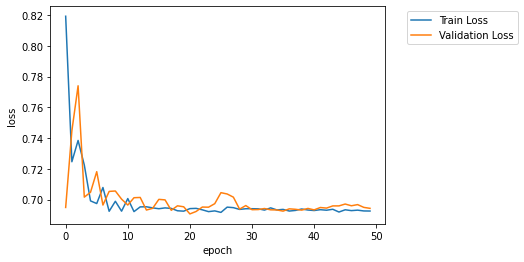

In [ ]:

#plotting of training and validation loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label="Validation Loss")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [ ]:
"""How to use the evaluation n way:

# Set the parameters
testSize = 5000 # how big you want your test size to be
numWay = 4 # how many ways metric

# Create the dataset for it and put it into dataloader
test_set = NWayOneShotEvalSet(categories, root_dir, testSize, numWay, transformations) 
test_loader = torch.utils.data.DataLoader(test_set, batch_size = 1, num_workers = 2)


# Load the models (the name of the loaded model can be changed in the load_checkpoint() function)
load_model = Net().to(device)
load_optimizer = optim.Adam(load_model.parameters(), lr=0.0006)


num_epochs = 10
eval_every = 1000
total_step = len(train_loader)*num_epochs
best_val_loss = load_checkpoint(load_model, load_optimizer)

print(best_val_loss)

# Evaluate from the test loader 

eval(load_model, test_loader)

"""